<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/Assignment_07_20150711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data-kmeans.csv')
data = dataset.values
label = np.random.randint(5, size = (200,1))
data = np.append(data, label, axis = 1)

In [82]:
Z = data[:,:2]
c = data[:,-1]

compute_distance(data[data[:,2] == 2][:,:2],[2,2])

array([ 16.4924225 ,  20.80865205,  22.20360331,  77.12976079,
        21.09502311,  79.07591289,  98.27003612,  33.24154028,
        84.86459804,  80.95677859,  69.64194139,  55.1724569 ,
        64.03124237,  70.45565982,  66.21933252,  71.02816343,
        69.65629907,  73.24616031,  61.7170965 ,  68.76772499,
        72.83543094,  69.42621983,  72.13875519,  77.83315489,
        69.33974329,  75.43208866,  80.05623024,  77.62087348,
        76.40026178,  80.15609771,  84.95881355,  72.44308111,
       100.41912169,  73.06161783,  82.3468275 , 110.53506231,
        88.60022573,  85.70880935, 112.04463396, 123.79418403,
       120.21647142, 118.98319209, 103.16006979, 118.82760622,
       157.43570116])

In [83]:
def compute_distance(a,b):
  dist = np.sqrt(np.sum((a-b) ** 2, axis = 1))
  return dist

def compute_centroid(Z):
  center = []
  ca = center.append
  for i in range(5):
    tmp = Z[Z[:,2] == i][:, :2]
    ca(np.sum(tmp,axis = 0) / len(tmp))
  return np.array(center)

#z individual point
def compute_label(z,M):
  label = np.argmin(compute_distance(z,M))
  return label

#Data is a data and M is set of centroids
def compute_loss(Data,M):
  loss = 0
  length = len(Data)
  for i in range(5):
    loss += np.sum(compute_distance(Data[Data[:,2] == i][:,:2],M[i]))
  return loss / length

In [84]:
def kmeans(Data, max_iter):
  length = len(Data)
  loss_iter = []
  M_iter = []
  for i in range(max_iter):
    M = compute_centroid(Data)
    M_iter.append(M)
    loss = compute_loss(Data,M)
    loss_iter.append(loss)
    for i in range(length):
      Data[i,2] = compute_label(Data[i][:2],M)
  return Data, loss_iter, M_iter

In [85]:
result, L_iter, M_iter = kmeans(data, 30)

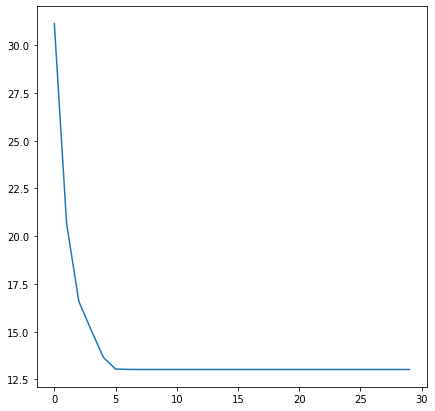

In [86]:
plt.figure(figsize = (7,7))
plt.plot(L_iter)
plt.show()

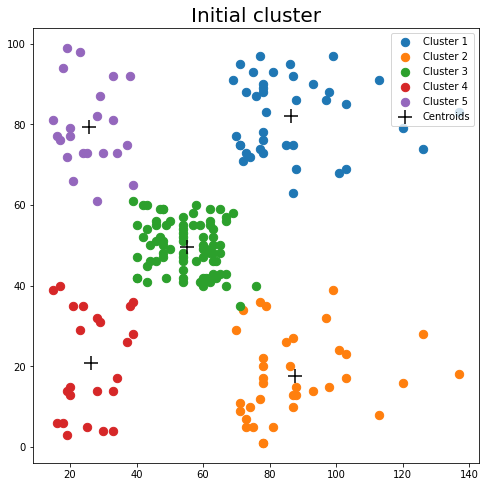

In [87]:
plt.figure(figsize = (8,8))
for i in range(5):
  tmp = result[result[:,2]==i][:, :2]
  plt.scatter(tmp[:,0],tmp[:,1], s = 70, label = "Cluster "+str(i+1))
plt.scatter(M_iter[-1][:,0],M_iter[-1][:,1],c = "black", marker = "+", s = 200, label = "Centroids")
plt.title("Initial cluster", fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

In [68]:
cen = compute_centroid(data)
for i in range(150,200):
  print(data[i,2]==compute_label(data[i][:2],cen))

True
False
False
False
False
False
True
False
False
False
True
False
False
False
False
True
True
False
True
False
False
True
True
False
False
False
False
False
True
True
False
False
True
False
True
False
True
False
False
False
False
True
False
False
False
True
False
True
True
True


# **[Output] Plot the data points**

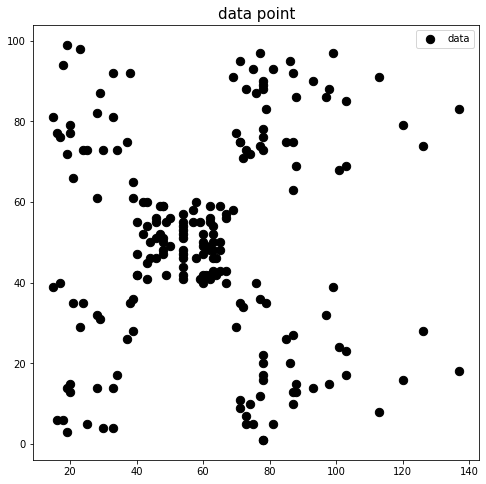

In [69]:
plt.figure(figsize = (8,8))
plt.scatter(data[:,0],data[:,1], c = "black", s = 70, label = "data")
plt.title("data point", fontsize = 15)
plt.legend(loc = "upper right")
plt.show()

# **[Output] Visualize the initial condition of the point labels**

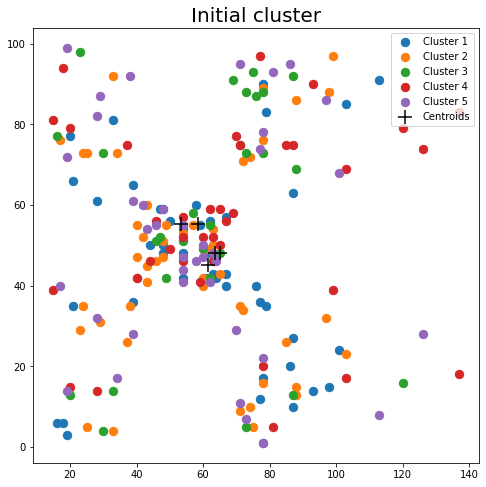

In [70]:
plt.figure(figsize = (8,8))
for i in range(5):
  tmp = data[data[:,2]==i][:, :2]
  plt.scatter(tmp[:,0],tmp[:,1], s = 70, label = "Cluster "+str(i+1))
plt.scatter(center[:,0],center[:,1],c = "black", marker = "+", s = 200, label = "Centroids")
plt.title("Initial cluster", fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

In [67]:
data

array([[ 15,  39,   3],
       [ 15,  81,   3],
       [ 16,   6,   0],
       [ 16,  77,   2],
       [ 17,  40,   4],
       [ 17,  76,   1],
       [ 18,   6,   0],
       [ 18,  94,   3],
       [ 19,   3,   0],
       [ 19,  72,   4],
       [ 19,  14,   4],
       [ 19,  99,   4],
       [ 20,  15,   3],
       [ 20,  77,   0],
       [ 20,  13,   2],
       [ 20,  79,   3],
       [ 21,  35,   0],
       [ 21,  66,   0],
       [ 23,  29,   1],
       [ 23,  98,   2],
       [ 24,  35,   1],
       [ 24,  73,   1],
       [ 25,   5,   1],
       [ 25,  73,   1],
       [ 28,  14,   3],
       [ 28,  82,   4],
       [ 28,  32,   4],
       [ 28,  61,   0],
       [ 29,  31,   1],
       [ 29,  87,   4],
       [ 30,   4,   2],
       [ 30,  73,   2],
       [ 33,   4,   1],
       [ 33,  92,   1],
       [ 33,  14,   2],
       [ 33,  81,   0],
       [ 34,  17,   4],
       [ 34,  73,   1],
       [ 37,  26,   1],
       [ 37,  75,   3],
       [ 38,  35,   1],
       [ 38,  92